# ML Clustering - Network Intrusion Detection
## Part 2 - DATA PREPROCESSING

In this notebook, we load the cleaned dataset file and process it into an acceptable format to clustering algorithms.

> **INPUT:** the cleaned dataset csv file as resulted from the previous cleaning phase.<br>
> **OUTPUT:** a processed (final version) of the dataset as a csv file.  

### 1. INITIALIZATION

In [2]:
# Import necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [4]:
# Initialize required variables to read the cleaned data file
data_file_location = "..\\data\\interim\\"
data_file_name = "kddcup99_cleaned"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

### 3. EXPLORING DATASET

In [5]:
# Get a general overview of the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     976158 non-null  int64  
 1   protocol_type                976158 non-null  object 
 2   service                      976158 non-null  object 
 3   flag                         976158 non-null  object 
 4   src_bytes                    976158 non-null  int64  
 5   dst_bytes                    976158 non-null  int64  
 6   land                         976158 non-null  int64  
 7   wrong_fragment               976158 non-null  int64  
 8   urgent                       976158 non-null  int64  
 9   hot                          976158 non-null  int64  
 10  num_failed_logins            976158 non-null  int64  
 11  logged_in                    976158 non-null  int64  
 12  num_compromised              976158 non-null  int64  
 13 

From the information provided by info() function we observe that the majority of data fields are numerical, while only 3 out of the 40 columns are categorical and should be further processed using some encoding approaches.

### 4. ENCODING CATEGORICAL FEATURES

#### Explore Categorical Attributes

The data set includes three categorical features, that need to be converted into a numerical representation so that they are acceptable to data analysis and prediction algorithms.

In [6]:
# Check the unique values of categorical features
categorical_features = ["protocol_type", "service", "flag"]
for c in categorical_features:
    print(f"Feature {c} has {data[c].nunique()} unique values.")

Feature protocol_type has 3 unique values.
Feature service has 53 unique values.
Feature flag has 10 unique values.


We have two features with a relatively limited number of unique values, however, the "service" attribute alone spans 53 different values (importing the dataset multiple times may produce slightly different distributions since the sklearn library implies a random factor when generating the "SA" version of kddcup99 data set). 

The high number of unique values might be challenging to convert since it may contribute to substantially expanding the data set dimensions (specifically in the case of One-Hot Encoding which we will use later on in this section).

A suitable approach to overcome this issue is to combine less frequent values into a single alternative called "other".

In [7]:
# Check the distribution of the 10 most frequent values in the "service" attribute
data["service"].value_counts(normalize=True).head(10)

http        0.634167
smtp        0.097700
private     0.076576
domain_u    0.059184
other       0.057915
ftp_data    0.039029
ecr_i       0.005979
urp_i       0.005506
finger      0.005143
ntp_u       0.003927
Name: service, dtype: float64

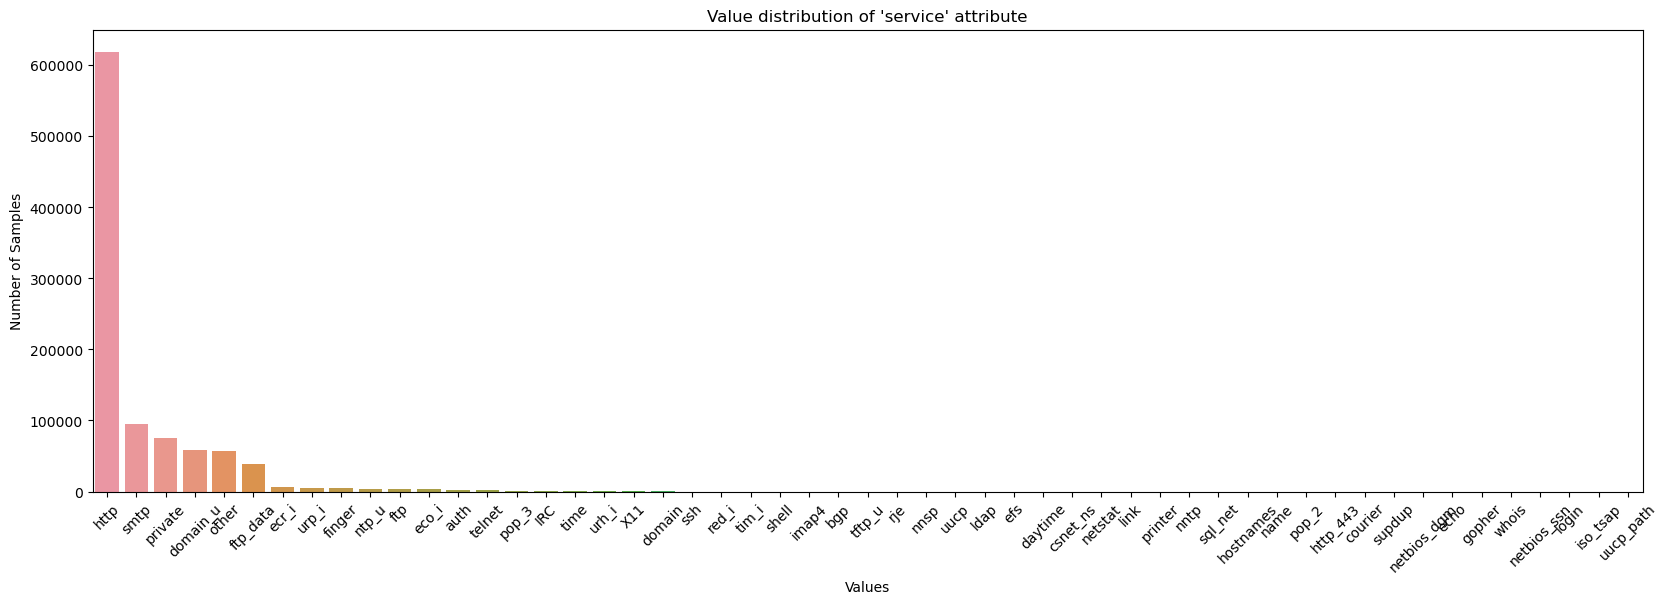

In [9]:
# Plot the value distribution of "service" attribute

# Create figure
plt.figure(figsize=(20,6))

# Plot data points
service_plot = sns.countplot(data=data, x="service", order=data["service"].value_counts().index)

# Set and rotate x axis ticks
service_plot.set_xticklabels(service_plot.get_xticklabels(), rotation=45)

# Set title and axes labels
plt.title("Value distribution of 'service' attribute")
plt.xlabel("Values")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()

The value distribution of "service" attribute revealed that the majority of data samples belong to a limited set of values, namely 6 unique ones. While the remaining minority samples span across the other 47 possible values.

This indicates a possibility of combining less frequent values into a single (combined) one.

Since there are already samples with "service" equals "other", we will combine the rarely occurring values into a new label called "combined", to avoid creating a bias towards the original "other" samples.

#### Combine Less-Frequent Values

In [10]:
# Combine less frequent "service" values into "Combined"
service_freq_vals = list(data["service"].value_counts().head(6).index)
data["service"] = data["service"].apply(lambda x: x if x in service_freq_vals else "combined")

In [11]:
# Check value distribution after combining rare values
data["service"].value_counts(normalize=True)

http        0.634167
smtp        0.097700
private     0.076576
domain_u    0.059184
other       0.057915
ftp_data    0.039029
combined    0.035430
Name: service, dtype: float64

As a result, a new label was created to aggregate all rare values and the vector of "service" values has been decreased from 53 possible values down to only 7 unique ones, which accounts for better conditions to apply one-hot encoding.

#### One-Hot Encoding

Since there is no implicit order among the individual values of categorical attributes, we will use the One-Hot Encoding mechanism to transfer each value into a vector of 1 and 0s, representing the absence/presence of this particular value in each sample.

In [12]:
# Initialize the encoder with its default parameters
ohe = OneHotEncoder()

# Fit the encoder to categorical features in the dataset
encoded_features = ohe.fit_transform(data[categorical_features])

# Create a DataFrame of encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Check encoding results 
encoded_features_df

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
976154,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976156,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


As shown in this overview and with referring to the One-Hot Encoding algorithm, the total number of resulting attributes is 20, which matches the sum of all distinct values of considered features (3+7+10=20)

In [13]:
# Merge encoded features with original dataset and drop categorical columns
data = pd.concat([data, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [14]:
# Check new dataset dimensions
data.shape

(976158, 57)

The dimensions of the dataset, namely attributes, has increased as a natural outcome of the encoding process. The new attribute number is interpreted as follows:
- Loaded data set attributes: 40
- New encoded attributes: 20
- Dropped categorical attributes: 3
- Final attributes: 40 - 3 + 20 = 57

In [15]:
# Check data fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     976158 non-null  int64  
 1   src_bytes                    976158 non-null  int64  
 2   dst_bytes                    976158 non-null  int64  
 3   land                         976158 non-null  int64  
 4   wrong_fragment               976158 non-null  int64  
 5   urgent                       976158 non-null  int64  
 6   hot                          976158 non-null  int64  
 7   num_failed_logins            976158 non-null  int64  
 8   logged_in                    976158 non-null  int64  
 9   num_compromised              976158 non-null  int64  
 10  root_shell                   976158 non-null  int64  
 11  su_attempted                 976158 non-null  int64  
 12  num_root                     976158 non-null  int64  
 13 

Now we have all attributes being numerical and ready for normalization.

### 5. DATA NORMALIZATION

Since the number of features in the original dataset was relatively high, and it has been further increased as a result of categorical features encoding, it might be useful to reduce the dimensionality of the dataset.

To do so, we will apply the Principle Component Analysis (PCA) technique which is very common to solve such types of problems. However, since PCA implies implementing Euclidean distance calculations, the features are supposed to be normalized to the same scale.

Besides PCA, data normalization is needed anyway since the KMeans clustering algorithm we are going to apply to group the data points also encompasses distance measuring and thus expects a normalized dataset.

For this reason, we will apply a standard scaler to transfer each variable to a new value distribution so that the mean would be 0 and standard deviation is 1.

In [16]:
# Initiate StandardScaler with its default parameters
scaler = StandardScaler()

# Apply scaler to all features and store results in a new DataFrame
data_attributes = data.columns
data[data_attributes] = scaler.fit_transform(data[data_attributes].values)

In [17]:
# Check the attribute distributions after scaling
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,976158.0,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,976158.000000,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05
mean,-8.268913e-17,-1.264721e-18,2.110902e-19,2.544001e-18,0.0,7.833994e-19,-2.867915e-18,6.660260e-19,1.714344e-16,7.915883e-19,-9.757463e-18,1.266541e-18,4.367384e-19,-2.649546e-18,2.427537e-18,1.991527e-17,-5.506998e-19,-4.454731e-18,3.726834e-17,-2.981467e-17,9.317085e-18,-3.260980e-17,7.220013e-17,1.623939e-17,2.862208e-15,-5.686333e-17,-7.034399e-17,1.653783e-17,-2.142930e-16,1.015562e-16,8.210681e-18,1.844783e-16,-5.264153e-17,0.000000,3.726834e-18,1.483091e-17,-1.034051e-16,-9.317085e-18,-2.345576e-16,-7.430375e-17,6.521959e-18,-5.438848e-17,-2.853357e-18,5.473787e-17,4.600311e-17,1.725990e-16,5.334031e-17,-2.087245e-18,3.079005e-17,-1.892533e-18,-1.272364e-17,-3.726834e-18,3.432036e-18,-7.351762e-19,3.035332e-18,-1.837795e-16,-1.956224e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.607954e-01,-1.337212e-02,-8.936717e-03,-2.677876e-03,0.0,-2.244964e-03,-5.306426e-02,-7.496676e-03,-1.590866e+00,-4.428632e-03,-1.759181e-02,-1.014425e-02,-7.339762e-03,-2.122207e-02,-1.891290e-02,-6.444960e-02,-1.431381e-03,-6.231571e-02,-3.086939e-01,-3.701363e-01,-5.805941e-02,-6.537320e-02,-2.443213e-01,-2.468141e-01,-1.012206e+01,-1.579768e-01,-4.785309e-01,-1.439325e+00,-2.318697e+00,-2.759007e+00,-3.135693e-01,-4.803413e-01,-4.786836e-01,-0.070608,-5.735165e-02,-2.566606e-01,-2.555306e-01,-1.255996e-01,-1.930531e+00,-4.937773e-01,-1.916536e-01,-2.508130e-01,-2.015282e-01,-1.316619e+00,-2.479418e-01,-2.879684e-01,-3.290582e-01,-3.649342e-03,-2.412045e-01,-2.490303e-02,-1.874836e-02,-3.490701e-02,-2.326346e-02,-1.252044e-02,-6.864819e-03,-4.032675e+00,-1.431381e-03
25%,-1.607954e-01,-1.203950e-02,-8.612061e-03,-2.677876e-03,0.0,-2.244964e-03,-5.306426e-02,-7.496676e-03,-1.590866e+00,-4.428632e-03,-1.759181e-02,-1.014425e-02,-7.339

As this statistical overview indicated, all attributes have been transformed so their standard deviations are to 1 and means equal to 0 (very close to 0 due to limitations with numerical representation).

Having that said, the dataset is now processed and ready for analysis.

### 6. STORE PROCESSED DATASET

In [18]:
# Set file location and name
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Store processed dataset to a csv file
data.to_csv(data_file_location + data_file_name + data_file_ext)